In [1]:
# Regression method

MAE: 72.97823916949491
MSE: 7213.871121021888


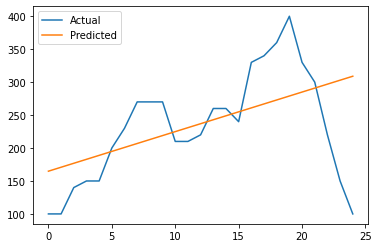

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
# Load data into a Pandas DataFrame
df = pd.read_csv("/kaggle/input/data-t/data_t.csv")

# Extract the independent and dependent variables
X = df[["t"]]
y = df["Actual"]
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
# Add the predicted values to the original dataframe
df["Regression method"] = model.predict(df[["t"]])
# Plot the actual values and the predicted values
plt.plot(df["t"], df["Actual"], label="Actual")
plt.plot(df["t"], df["Regression method"], label="Predicted")
plt.legend()
plt.show()


In [3]:
# Autoregressive method with a moving average

<AxesSubplot:xlabel='t'>

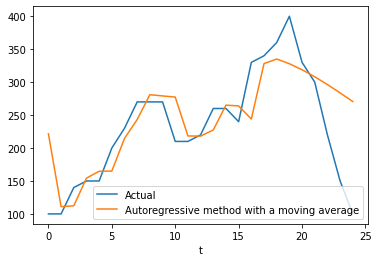

In [4]:
import numpy as np
import pandas as pd
import statsmodels.tsa.arima.model as arima_model

# Load the data into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/data-t/data_t.csv')

# Split the data into training and test sets
train_data = df[:18]
test_data = df

# Fit an ARMA model to the training data
model = arima_model.ARIMA(train_data['Actual'], order=(2, 0, 1)).fit()

# Make predictions on the test set
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])

# Add the predictions to the DataFrame
df['Autoregressive method with a moving average'] = np.nan
df.loc[test_data.index, 'Autoregressive method with a moving average'] = predictions

# Plot the actual and predicted values
df.plot(x='t', y=['Actual', 'Autoregressive method with a moving average'])


In [5]:
# Autoregressive with exponential smoothing

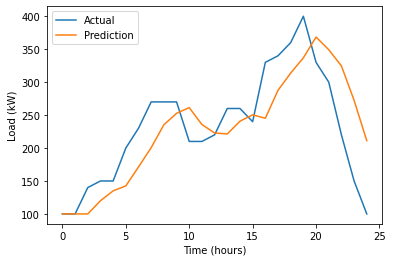

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/kaggle/input/data-t/data_t.csv")

# Extract the time series data
times = data["t"]
values = data["Actual"]

# Set the smoothing factor (alpha)
alpha = 0.5

# Initialize the prediction array
predictions = np.zeros(len(times))
predictions[0] = values[0]

# Loop through the time series data and make predictions
for i in range(1, len(times)):
  predictions[i] = alpha * values[i-1] + (1 - alpha) * predictions[i-1]

# Plot the actual data and the predictions
plt.plot(times, values, label="Actual")
plt.plot(times, predictions, label="Prediction")
plt.xlabel("Time (hours)")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()

In [7]:
# SSA

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


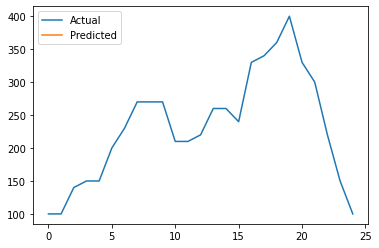

In [8]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data into a Pandas DataFrame and set the 't' column as the index
df = pd.read_csv('/kaggle/input/data-t/data_t.csv', index_col='t')

# Decompose the time series into its trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Actual'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Use the Simple Exponential Smoothing (SES) method to generate predictions
model = SimpleExpSmoothing(trend)
model_fit = model.fit(smoothing_level=0.9)
predictions = model_fit.predict(len(trend), len(trend) + 23)

# Plot the actual and predicted data
plt.plot(df['Actual'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
